In [630]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [631]:
master_df = pd.read_csv('master_df.csv').drop(columns = 'Unnamed: 0')
master_df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,liveness,valence,tempo,total_followers,genres,year,month,day,day_of_week,category
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.0830,0.301,174.152,28456266,['pop'],2017,1,1,6,foreign
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.0902,0.494,85.043,7338877,"['pop', 'talentshow', 'ukpop']",2017,1,1,6,foreign
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.1110,0.661,95.010,17287932,"['dancepop', 'edm', 'electropop', 'pop', 'popd...",2017,1,1,6,foreign
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.1150,0.296,90.000,17287932,"['dancepop', 'edm', 'electropop', 'pop', 'popd...",2017,1,1,6,foreign
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.0975,0.447,100.048,29001677,"['pop', 'poprock']",2017,1,1,6,foreign


In [632]:
master_df.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'artist_id', 'artist_name', 'album_id', 'duration', 'release_date',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'total_followers', 'genres', 'year', 'month', 'day',
       'day_of_week', 'category'],
      dtype='object')

In [633]:
#master_df.info()

# Percentage OPM artist in the TOP 200 for 2017

In [634]:
# percentage of the artist that made it to the top 200 atleast once.
df_2017 = master_df[master_df['year'] == 2017]

opm_art = df_2017[df_2017['category'] == 'opm']
opm_art = len(opm_art['artist'].unique())

for_art = df_2017[df_2017['category'] == 'foreign']
for_art = len(for_art['artist'].unique())

percent_17 = (opm_art / (opm_art + for_art))*100.0
percent_17

17.24137931034483

# Percentage OPM artist in the TOP 200 for 2018

In [635]:
# percentage of the artist that made it to the top 200 atleast once.
df_2018 = master_df[master_df['year'] == 2018]

opm_art = df_2018[df_2018['category'] == 'opm']
opm_art = len(opm_art['artist'].unique())

for_art = df_2018[df_2018['category'] == 'foreign']
for_art = len(for_art['artist'].unique())

percent_18 = (opm_art / (opm_art + for_art))*100.0
percent_18

20.454545454545457

# Percentage OPM artist in the TOP 200 for 2019

In [636]:
# percentage of the artist that made it to the top 200 atleast once.
df_2019 = master_df[master_df['year'] == 2019]

opm_art = df_2019[df_2019['category'] == 'opm']
opm_art = len(opm_art['artist'].unique())

for_art = df_2019[df_2019['category'] == 'foreign']
for_art = len(for_art['artist'].unique())

percent_19 = (opm_art / (opm_art + for_art))*100.0
percent_19

23.18840579710145

# Percentage OPM artist in the TOP 200 for 2020

In [637]:
# percentage of the artist that made it to the top 200 atleast once.
df_2020 = master_df[master_df['year'] == 2020]

opm_art = df_2020[df_2020['category'] == 'opm']
opm_art = len(opm_art['artist'].unique())

for_art = df_2020[df_2020['category'] == 'foreign']
for_art = len(for_art['artist'].unique())

percent_20 = (opm_art / (opm_art + for_art))*100.0
percent_20

21.428571428571427

In [638]:
perc_lst_ = [percent_17, percent_18, percent_19, percent_20]
year_ = [2017, 2018, 2019, 2020]

Text(0, 0.5, 'Percentage of OPM artist')

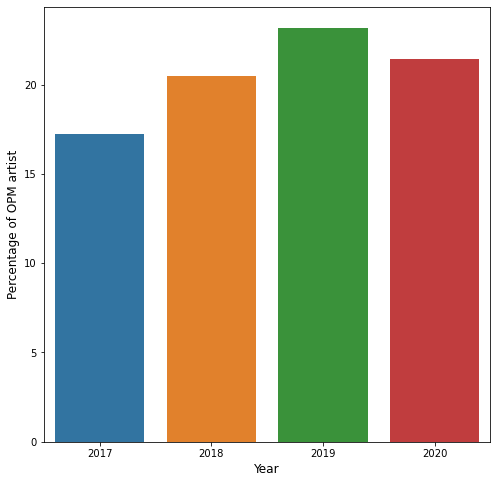

In [639]:
plt.figure(figsize = (8,8))
sns.barplot(x = year_, y = perc_lst_)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Percentage of OPM artist', fontsize = 12)

# 2nd EDA - Characteristics - aggregated  (mean, variation/range, etc)

# Audio Features

In [640]:
# for all the opm music of the year 2017
df_opm_17 = master_df[(master_df['year'] == 2017) & (master_df['category'] == 'opm')]
df_opm_17

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,liveness,valence,tempo,total_followers,genres,year,month,day,day_of_week,category
201858,2017-01-01,25,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,70631,0jKQrxK2zHqxyOAyIMrUQt,SUD,0qwujayb77utSpftsXjdP3,326000,...,0.1090,0.280,124.570,286246,"['opm', 'pinoyrock']",2017,1,1,6,opm
201859,2017-01-01,40,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,52955,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,...,0.0669,0.265,84.007,1929621,"['opm', 'pinoyrock']",2017,1,1,6,opm
201860,2017-01-01,46,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,48330,3wbCeEPAW6po7J46netxMT,Up Dharma Down,4SjshYHT8OeSHB6zun2Hxx,222446,...,0.0809,0.511,155.982,645645,"['opm', 'pinoyindie', 'pinoyreggae', 'pinoyroc...",2017,1,1,6,opm
201861,2017-01-01,50,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,39075,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,52xu8EP3ABmpNk0LUzF3ih,254249,...,0.3210,0.108,114.694,5422057,['opm'],2017,1,1,6,opm
201862,2017-01-01,55,3T8yMLawoliJaN1hAGFFmv,Sigurado,Up Dharma Down,34520,3wbCeEPAW6po7J46netxMT,Up Dharma Down,5bRwSxYckOjIw3oISF6MQk,339661,...,0.1110,0.963,113.010,645645,"['opm', 'pinoyindie', 'pinoyreggae', 'pinoyroc...",2017,1,1,6,opm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218034,2017-12-31,180,5sLGYJOhLP197nmkaRMMEH,Ngayong Gabi,Al James,24112,2G7VQ1kVhVfNagytlousgm,Al James,51UmoT2xdda5pAZcRFMiot,267456,...,0.2000,0.433,116.009,350803,"['opm', 'pinoyalternativerap', 'pinoyhiphop', ...",2017,12,31,6,opm
218035,2017-12-31,181,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,24004,1vg8YXdgvLLPPeXZkM7g5W,Daryl Ong,0YOtu6QNH83HIjdWWI30qr,262086,...,0.1120,0.306,91.961,457439,['opm'],2017,12,31,6,opm
218036,2017-12-31,184,0qt9ivU6UEP3YdNUiZsnYR,"Dying Inside To Hold You - From "" All Of You"" ...",Darren Espanto,23050,0u4G1K1CSzcp5PZ6G6FIGu,Darren Espanto,0TXpE1J3GKy0c03GRKEfof,236283,...,0.1100,0.403,104.913,373549,['opm'],2017,12,31,6,opm
218037,2017-12-31,185,135ggzbjOogZ75IQ0LQi8r,Ang Huling El Bimbo,Eraserheads,22970,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,6JbcJM51TZIX8nkjns3M4U,447333,...,0.2640,0.436,89.497,1791665,"['opm', 'pinoyreggae', 'pinoyrock']",2017,12,31,6,opm


In [641]:
art_list17 = df_opm_17.groupby(['track_id'])[['streams']].sum().sort_values(by ='streams', ascending = False)[:100]
art_list17 = art_list17.index
art_list17

Index(['6M21eWbEw74XDdoQsNIinq', '4ai7c2BUjNpElhZdZDH7qF',
       '2IMODbij0lZ5CuAjZi0IDE', '6NFKf8vBApSvtzkapYmnVR',
       '6xQs6y6CpDqK9VKCktApEL', '0YyM8aEdbjGfLWPn6fdcn7',
       '0zFYa7NIpKhmom8zrZx7Ga', '01YEqVPCm0vqRLA9w43bic',
       '46ixegtxjERQMCutmp09Sa', '2PcbtMoqOlGSzOfyJlkB06',
       '4aUf4lzQ1di5JajZ4a9FuI', '7sW3f7PqDV7BQ7qqeVBJIA',
       '5QVuf1MpdzFtFoJGwcKosa', '29xs643Q96uQLD8f7SxYYw',
       '0Dljpp52vCmtXi0E94qjfo', '39V6cEoNFwDFRJEOKyj4OR',
       '6C2nrsOlb3jOUGcJAmPrTA', '1VvFtp71ibaXiHxurBlXuw',
       '3VcVQmMivq2ISfKUmIuvMK', '2qqte0XT0eFFVLuNP7Qena',
       '1MkiRsYBkXbXvdiYvTTiQT', '6XmskR1cMfgys1W7dExmgi',
       '2S80c51YXgJQhkhX603fMA', '1A40ESJJPEEJrqjC9BUO2B',
       '2ZiNCGDMapQzMtnPRVOKZI', '42nrX5b8ZUYRcw2puNY8tb',
       '4OjORl39ULsmkJHOPbOOPJ', '6CHpr3pY2MbJ5y1076UDnI',
       '0MqkYdGBzHx7lnaFvo7doR', '4r7vGTk9HCW7YDorNWoclF',
       '0mqJsNkF3MRtBkRhzVskVX', '1qoXYfWILyuN0EatImGlma',
       '14pj36HKHd6c72njvGVPWU', '4g8lRiznlad8Vy4HR1J3B9

In [642]:
audio_feat = ['duration','popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [643]:
audio_feat_df17 = df_opm_17[df_opm_17['track_id'].isin(art_list17)]
audio_feat_df17 = audio_feat_df17[audio_feat].drop_duplicates()
audio_feat_df17

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
201858,326000,59,0.635,0.376,9,-6.100,1,0.0457,0.0104,0.000000,0.1090,0.280,124.570
201859,241029,61,0.696,0.262,11,-15.073,1,0.0310,0.5190,0.000000,0.0669,0.265,84.007
201860,222446,65,0.686,0.322,6,-13.200,1,0.0369,0.1650,0.029600,0.0809,0.511,155.982
201861,254249,58,0.374,0.125,7,-14.847,1,0.0383,0.8520,0.000005,0.3210,0.108,114.694
201862,339661,30,0.757,0.669,11,-8.813,1,0.0385,0.2950,0.027100,0.1110,0.963,113.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217680,266086,43,0.536,0.550,1,-5.885,1,0.0278,0.3120,0.000000,0.3470,0.175,91.960
217684,274811,44,0.615,0.597,0,-8.784,1,0.0318,0.6120,0.000000,0.0657,0.353,99.988
217685,284920,43,0.518,0.332,1,-11.726,1,0.0287,0.2080,0.000000,0.1210,0.240,130.259
217709,487578,50,0.522,0.752,1,-4.507,1,0.0284,0.0805,0.000722,0.1090,0.289,100.024


In [644]:
audio_feat_df17['duration'] = audio_feat_df17['duration'] / 60000

In [645]:
audio_feat_df17.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.302740,41.79000,0.564760,0.431866,5.650000,-8.67278,0.900000,0.040685,0.525163,0.000896,0.130756,0.358652,118.648700
std,0.839335,23.62386,0.136021,0.167445,3.608002,2.91917,0.301511,0.023643,0.251800,0.004301,0.070882,0.186584,26.715567
min,2.751117,0.00000,0.276000,0.089600,0.000000,-22.08700,0.000000,0.024200,0.010400,0.000000,0.033800,0.081200,60.009000
25%,3.911367,32.25000,0.489500,0.313000,2.000000,-10.36225,1.000000,0.029600,0.306250,0.000000,0.096350,0.213750,95.014750
50%,4.198100,53.00000,0.565000,0.397500,6.000000,-8.12200,1.000000,0.032650,0.551500,0.000000,0.112000,0.317000,119.954500
75%,4.615946,58.00000,0.657750,0.555250,9.000000,-6.47225,1.000000,0.040075,0.746250,0.000005,0.136250,0.453750,139.834500
max,8.126300,70.00000,0.865000,0.894000,11.000000,-2.89200,1.000000,0.153000,0.960000,0.029600,0.499000,0.963000,185.998000


In [646]:
#for i in audio_feat:
#    sns.boxplot(audio_feat_df[i])
#    plt.show()

In [647]:
# for all the opm music of the year 2018
df_opm_18 = master_df[(master_df['year'] == 2018) & (master_df['category'] == 'opm')]

In [648]:
art_list18 = df_opm_18.groupby(['track_id'])[['streams']].sum().sort_values(by ='streams', ascending = False)[:100]
art_list18 = art_list18.index
art_list18

Index(['4u8RkgV6P4TLi89SmlUtv8', '3WUEs51GpcvlgU7lehLgLh',
       '2BgD4nRyx9EZ5o8YEnjRSV', '0ztDBQdQmdVZvorSmIjMih',
       '00mBzIWv5gHOYxwuEJXjOG', '6LJ1p1h5EcMK4VPeCLDSoF',
       '1yDiru08Q6omDOGkZMPnei', '3VQb0rq27GPX92X53Ni1Lc',
       '1X4l4i472kW5ofFP8Xo0x0', '5f9808hpiCpuNyqqdXmpF2',
       '6NFKf8vBApSvtzkapYmnVR', '6M21eWbEw74XDdoQsNIinq',
       '7MrDfa1uQGVXx0JMZ2u5tN', '0qt9ivU6UEP3YdNUiZsnYR',
       '0YyM8aEdbjGfLWPn6fdcn7', '7sW3f7PqDV7BQ7qqeVBJIA',
       '4JSDhJVmo2UqdF7nxbyenn', '2iOnWSWcChoGmUufbrQ00e',
       '2ZiNCGDMapQzMtnPRVOKZI', '0BkKdJSpKqzYLEneerSHq3',
       '6xQs6y6CpDqK9VKCktApEL', '1ER60P43ftVOLaMRvBfpnt',
       '0zFYa7NIpKhmom8zrZx7Ga', '2wTxJWt2gA9a1Z94dTnPiI',
       '7mxm4xOU54u1ODM9fS9w2y', '0GHwNr0lqf8jpc9wesmnHo',
       '5nMKJJ5Rl6X1yn58aVeICO', '6C2nrsOlb3jOUGcJAmPrTA',
       '2IMODbij0lZ5CuAjZi0IDE', '5zMR44ZH4KVZj4FlhTj3SE',
       '01YEqVPCm0vqRLA9w43bic', '6wdCelHrPh7UfliNjwRTUv',
       '46ixegtxjERQMCutmp09Sa', '6XmskR1cMfgys1W7dExmgi

In [649]:
audio_feat_df18 = df_opm_18[df_opm_18['track_id'].isin(art_list18)]
audio_feat_df18 = audio_feat_df18[audio_feat].drop_duplicates()
audio_feat_df18

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
218039,202452,41,0.651,0.421,10,-7.658,1,0.0673,0.8550,0.000109,0.0869,0.7740,119.866
218040,254249,58,0.374,0.125,7,-14.847,1,0.0383,0.8520,0.000005,0.3210,0.1080,114.694
218041,364076,0,0.724,0.684,5,-4.919,1,0.0569,0.7180,0.000000,0.0925,0.7650,80.004
218042,269583,44,0.286,0.391,2,-5.800,1,0.0300,0.3590,0.000000,0.1800,0.2180,174.858
218043,211200,53,0.764,0.894,0,-2.892,1,0.0327,0.2270,0.000000,0.0906,0.9630,99.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235257,343446,63,0.631,0.381,7,-11.808,1,0.0400,0.4470,0.000171,0.0902,0.3600,126.008
235412,243015,1,0.662,0.529,2,-8.539,1,0.0351,0.3410,0.000208,0.1050,0.4240,127.584
237187,288207,61,0.523,0.391,7,-9.283,1,0.0298,0.3950,0.000000,0.1420,0.3540,139.905
237860,282442,1,0.396,0.413,7,-11.566,1,0.0334,0.0877,0.000029,0.1240,0.1080,136.818


In [650]:
audio_feat_df18['duration'] = audio_feat_df18['duration'] / 60000

In [651]:
audio_feat_df18.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.336642,47.890000,0.574310,0.432546,5.250000,-8.63915,0.92000,0.040690,0.481101,0.000903,0.127927,0.368074,123.721390
std,0.783611,22.446297,0.148989,0.171309,3.412322,3.00933,0.27266,0.022419,0.285638,0.004475,0.066322,0.199665,25.098514
min,2.738667,0.000000,0.250000,0.089600,0.000000,-22.08700,0.00000,0.023200,0.007530,0.000000,0.047200,0.081200,74.050000
25%,3.886992,49.500000,0.491750,0.318500,2.000000,-10.08925,1.00000,0.030700,0.216750,0.000000,0.091200,0.217250,108.317000
50%,4.291142,57.000000,0.564500,0.400500,5.500000,-8.47850,1.00000,0.034600,0.436000,0.000000,0.109000,0.330500,125.056500
75%,4.669750,61.000000,0.678500,0.543000,7.000000,-6.64725,1.00000,0.040900,0.765500,0.000025,0.134250,0.442500,137.363000
max,7.455550,70.000000,0.895000,0.894000,11.000000,-2.89200,1.00000,0.197000,0.960000,0.029900,0.451000,0.965000,200.777000


In [652]:
#for i in audio_feat:
#    sns.boxplot(audio_feat_df[i])
#    plt.show()

In [653]:
# for all the opm music of the year 2019
df_opm_19 = master_df[(master_df['year'] == 2019) & (master_df['category'] == 'opm')]

In [654]:
art_list19 = df_opm_19.groupby(['track_id'])[['streams']].sum().sort_values(by ='streams', ascending = False)[:100]
art_list19 = art_list19.index
art_list19

Index(['2BgD4nRyx9EZ5o8YEnjRSV', '1X4l4i472kW5ofFP8Xo0x0',
       '1yDiru08Q6omDOGkZMPnei', '3WUEs51GpcvlgU7lehLgLh',
       '5f9808hpiCpuNyqqdXmpF2', '00mBzIWv5gHOYxwuEJXjOG',
       '0gDRtumoR9ZrvAlnniToMz', '2tzAN1L07SNwnOdgOEeuQr',
       '34ob61cxp34Sf7KHK6RnSU', '5l9g7py8RCblcvbZgGQgSd',
       '5nMKJJ5Rl6X1yn58aVeICO', '5NXdUJ3Z2jhlp2u1cj6f7m',
       '6IdEQ3HUseBeRUYFSzSMdL', '24ngpWhBOxKJtIPnzSNX8c',
       '2RgD3eO4IIGF16rR8Ch8OV', '6BxJLJw228OY5BFerPGl7z',
       '2mwd0LWLBgtQBEOLG96nbU', '58grXgbCj7t5ulr0TGLIr9',
       '5V2AX2WTOHl2FKtftvisV6', '6GIzDc4xBUeYHwubWwTrhC',
       '4u8RkgV6P4TLi89SmlUtv8', '7hoP5NDUXEbmOawvEAsi8h',
       '0ztDBQdQmdVZvorSmIjMih', '14BG5B1EJSCyNpZt096xXc',
       '06cUybZMETs4i3yQO1f7p3', '6NFKf8vBApSvtzkapYmnVR',
       '0Vmk6Ebk4QBq7r0VAz2a6s', '0GHwNr0lqf8jpc9wesmnHo',
       '4JSDhJVmo2UqdF7nxbyenn', '50hVyhZM4nvizfrQe38F3l',
       '6VqZS3Wmf53pbfDBVEYvnP', '5UhpceEr5XmbVwyoIUIRnh',
       '6wdCelHrPh7UfliNjwRTUv', '3vGkyQlCw8LklNip0ZUELC

In [655]:
audio_feat_df19 = df_opm_19[df_opm_19['track_id'].isin(art_list19)]
audio_feat_df19 = audio_feat_df19[audio_feat].drop_duplicates()
audio_feat_df19

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
241392,343446,63,0.631,0.381,7,-11.808,1,0.0400,0.4470,0.000171,0.0902,0.360,126.008
241393,267759,67,0.502,0.482,4,-4.736,1,0.0288,0.1610,0.000000,0.1870,0.132,133.894
241394,277098,68,0.660,0.373,7,-7.874,1,0.0290,0.7010,0.000000,0.2260,0.348,126.887
241395,243015,1,0.662,0.529,2,-8.539,1,0.0351,0.3410,0.000208,0.1050,0.424,127.584
241396,285138,65,0.518,0.762,7,-3.907,1,0.0305,0.0851,0.000000,0.1480,0.271,155.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261071,374117,64,0.883,0.569,1,-8.727,1,0.0617,0.5430,0.000066,0.0777,0.545,101.999
262013,268486,61,0.501,0.570,10,-6.490,1,0.0337,0.5690,0.000000,0.0649,0.311,139.516
263486,306204,62,0.526,0.571,7,-7.091,1,0.0295,0.4580,0.000000,0.1100,0.310,140.051
264179,245053,62,0.598,0.795,8,-1.602,1,0.0497,0.6230,0.000193,0.0971,0.499,97.999


In [656]:
audio_feat_df19['duration'] = audio_feat_df19['duration'] / 60000

In [657]:
audio_feat_df19.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.566076,53.630000,0.564770,0.429506,5.670000,-8.641210,0.92000,0.044955,0.467836,0.001776,0.135610,0.358731,114.770800
std,0.853405,18.604689,0.147997,0.158965,3.375656,2.919516,0.27266,0.034506,0.279099,0.013880,0.080548,0.172639,25.556675
min,2.653217,0.000000,0.283000,0.089600,0.000000,-15.418000,0.00000,0.023200,0.008190,0.000000,0.032500,0.064100,73.667000
25%,3.978013,55.000000,0.470250,0.327250,2.750000,-10.483500,1.00000,0.029750,0.192000,0.000000,0.092375,0.219250,87.999000
50%,4.468708,59.500000,0.556000,0.422000,6.000000,-8.354000,1.00000,0.035050,0.485500,0.000000,0.109000,0.346000,119.957000
75%,5.122167,63.000000,0.662000,0.543000,8.250000,-7.050000,1.00000,0.045775,0.678500,0.000029,0.133750,0.470500,135.332250
max,7.455550,70.000000,0.940000,0.795000,11.000000,-1.602000,1.00000,0.317000,0.952000,0.136000,0.451000,0.937000,163.434000


In [658]:
# for all the opm music of the year 2020
df_opm_20 = master_df[(master_df['year'] == 2020) & (master_df['category'] == 'opm')]

In [659]:
art_list20 = df_opm_20.groupby(['track_id'])[['streams']].sum().sort_values(by ='streams', ascending = False)[:100]
art_list20 = art_list20.index
art_list20

Index(['65sEZZaxTjLMD8vNgPoMz5', '2Mo4pOpCYXOu33856sMQLh',
       '5l9g7py8RCblcvbZgGQgSd', '47UUjZbqZjcrzELnFBB1Ht',
       '3WUEs51GpcvlgU7lehLgLh', '6VqZS3Wmf53pbfDBVEYvnP',
       '1yDiru08Q6omDOGkZMPnei', '4kS01K2URu522IomkGOFHl',
       '0G5qmu4TsdUH19zdcbI9Ui', '3PgjBOoA5OytNGkglObpOd',
       '4YMfE4r1JWADFw2Fn74XW2', '1pi3VCMlGVaXvrjlVOkBPN',
       '1X4l4i472kW5ofFP8Xo0x0', '0luyrm1L6gjtoLekHOf67t',
       '1x7DysraeqSgVgj95hHc3U', '4rG3h1QwgjSSWz8EIjCFrm',
       '2BgD4nRyx9EZ5o8YEnjRSV', '6wdCelHrPh7UfliNjwRTUv',
       '34ob61cxp34Sf7KHK6RnSU', '3OpGUlDmRUXh0NkIYWoIlD',
       '00mBzIWv5gHOYxwuEJXjOG', '2tR5liucorXRwduxr0qEx6',
       '6IdEQ3HUseBeRUYFSzSMdL', '24ngpWhBOxKJtIPnzSNX8c',
       '3sWLOFGI7dNN6YBM1m1RKB', '0knRQzgvbUed6K74mX81hG',
       '13pv5UWJttg8NNplCaaOYh', '5jLUKFlEJzOf6b6PCaohFI',
       '3ueq4reab02CypseErxvwS', '58grXgbCj7t5ulr0TGLIr9',
       '3X9c4tBzSdGhlO4Fx3WYgW', '0HZ3OUVrGHxttD2EuHqRm3',
       '63qA4ydokzNOFpsaNlsYsC', '4u8RkgV6P4TLi89SmlUtv8

In [660]:
audio_feat_df20 = df_opm_20[df_opm_20['track_id'].isin(art_list20)]
audio_feat_df20 = audio_feat_df20[audio_feat].drop_duplicates()
audio_feat_df20

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
268109,204512,63,0.710,0.388,5,-12.106,1,0.0545,0.67000,0.000000,0.1770,0.759,114.858
268110,321817,70,0.604,0.446,9,-8.010,1,0.0341,0.63000,0.000000,0.0859,0.199,143.946
268111,227370,66,0.669,0.420,2,-8.464,1,0.0253,0.50600,0.000000,0.4040,0.523,95.049
268112,268486,61,0.501,0.570,10,-6.490,1,0.0337,0.56900,0.000000,0.0649,0.311,139.516
268113,304664,64,0.677,0.433,8,-8.518,1,0.0370,0.54500,0.000000,0.1050,0.498,134.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289349,282490,71,0.373,0.245,5,-12.450,1,0.0354,0.76600,0.000365,0.0768,0.174,127.067
289392,194757,72,0.706,0.457,4,-8.667,0,0.0597,0.36900,0.000000,0.1060,0.427,144.962
289920,282490,63,0.373,0.245,5,-12.450,1,0.0354,0.76600,0.000365,0.0768,0.174,127.067
290295,254000,69,0.544,0.781,8,-4.860,1,0.0352,0.00781,0.000084,0.1320,0.422,124.869


In [661]:
audio_feat_df20['duration'] = audio_feat_df20['duration'] / 60000

In [662]:
audio_feat_df20.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.428245,61.480000,0.57117,0.442880,5.290000,-8.739840,0.870000,0.050931,0.478580,0.000502,0.136234,0.372741,121.180360
std,0.918564,9.714594,0.14125,0.145321,3.220186,2.684363,0.337998,0.059493,0.269836,0.003057,0.069399,0.167838,27.085317
min,2.295283,1.000000,0.28300,0.121000,0.000000,-15.515000,0.000000,0.024200,0.007810,0.000000,0.032500,0.064100,74.050000
25%,3.786821,60.000000,0.48250,0.338500,2.000000,-10.636000,1.000000,0.030100,0.238000,0.000000,0.095900,0.240250,95.727000
50%,4.435800,63.000000,0.55600,0.428500,5.000000,-8.491000,1.000000,0.033950,0.499000,0.000000,0.111000,0.352500,126.992500
75%,4.883408,65.000000,0.66825,0.548750,7.000000,-7.057000,1.000000,0.043150,0.700250,0.000012,0.157250,0.498000,139.936500
max,7.455550,75.000000,0.88900,0.795000,11.000000,-1.602000,1.000000,0.420000,0.961000,0.029600,0.404000,0.937000,179.998000


In [663]:
# data frames of audio features: audio_feat_df17, audio_feat_df18, audio_feat_df19, audio_feat_df20
audio_feat = ['duration','popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
yr_ = [2017, 2018, 2019, 2020]
# trying only the mean

In [664]:
new_df = pd.DataFrame([audio_feat_df17.mean(),audio_feat_df18.mean(), audio_feat_df19.mean(), audio_feat_df20.mean()])
new_df

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4.302740,41.79,0.56476,0.431866,5.65,-8.67278,0.90,0.040685,0.525163,0.000896,0.130756,0.358652,118.64870
1,4.336642,47.89,0.57431,0.432546,5.25,-8.63915,0.92,0.040690,0.481101,0.000903,0.127927,0.368074,123.72139
2,4.566076,53.63,0.56477,0.429506,5.67,-8.64121,0.92,0.044955,0.467836,0.001776,0.135610,0.358731,114.77080
3,4.428245,61.48,0.57117,0.442880,5.29,-8.73984,0.87,0.050931,0.478580,0.000502,0.136234,0.372741,121.18036


<AxesSubplot:>

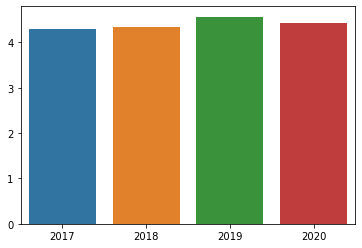

In [665]:
sns.barplot(x = yr_, y = [audio_feat_df17['duration'].mean(),audio_feat_df18['duration'].mean(),audio_feat_df19['duration'].mean(),audio_feat_df20['duration'].mean()])

<AxesSubplot:>

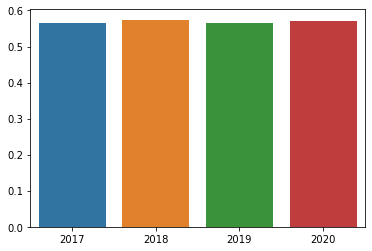

In [666]:
sns.barplot(x = yr_, y = [audio_feat_df17['danceability'].mean(), audio_feat_df18['danceability'].mean(), audio_feat_df19['danceability'].mean(), audio_feat_df20['danceability'].mean()])

<AxesSubplot:>

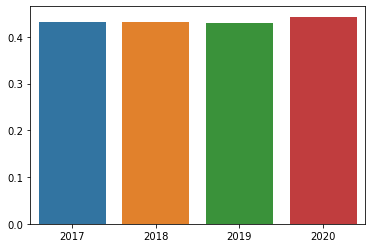

In [667]:
sns.barplot(x = yr_, y = [audio_feat_df17['energy'].mean(), audio_feat_df18['energy'].mean(), audio_feat_df19['energy'].mean(), audio_feat_df20['energy'].mean()])

<AxesSubplot:>

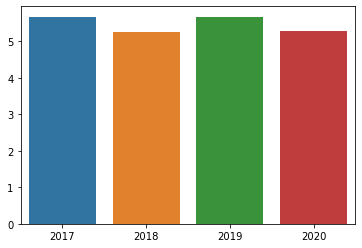

In [668]:
sns.barplot(x = yr_, y = [audio_feat_df17['key'].mean(), audio_feat_df18['key'].mean(), audio_feat_df19['key'].mean(), audio_feat_df20['key'].mean()])

<AxesSubplot:>

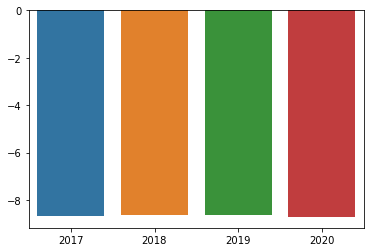

In [669]:
sns.barplot(x = yr_, y = [audio_feat_df17['loudness'].mean(), audio_feat_df18['loudness'].mean(), audio_feat_df19['loudness'].mean(), audio_feat_df20['loudness'].mean()])

<AxesSubplot:>

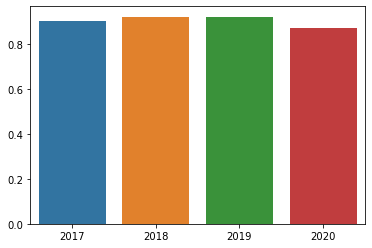

In [670]:
sns.barplot(x = yr_, y = [audio_feat_df17['mode'].mean(), audio_feat_df18['mode'].mean(), audio_feat_df19['mode'].mean(), audio_feat_df20['mode'].mean()])

<AxesSubplot:>

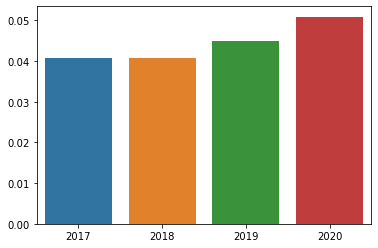

In [671]:
sns.barplot(x = yr_, y = [audio_feat_df17['speechiness'].mean(), audio_feat_df18['speechiness'].mean(), audio_feat_df19['speechiness'].mean(), audio_feat_df20['speechiness'].mean()])

<AxesSubplot:>

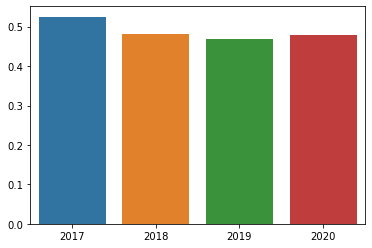

In [672]:
sns.barplot(x = yr_, y = [audio_feat_df17['acousticness'].mean(), audio_feat_df18['acousticness'].mean(), audio_feat_df19['acousticness'].mean(), audio_feat_df20['acousticness'].mean()])

<AxesSubplot:>

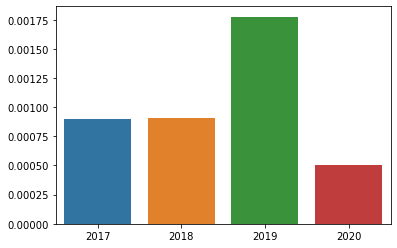

In [673]:
sns.barplot(x = yr_, y = [audio_feat_df17['instrumentalness'].mean(), audio_feat_df18['instrumentalness'].mean(), audio_feat_df19['instrumentalness'].mean(), audio_feat_df20['instrumentalness'].mean()])

<AxesSubplot:>

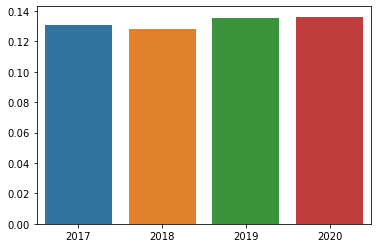

In [674]:
sns.barplot(x = yr_, y = [audio_feat_df17['liveness'].mean(), audio_feat_df18['liveness'].mean(), audio_feat_df19['liveness'].mean(), audio_feat_df20['liveness'].mean()])

<AxesSubplot:>

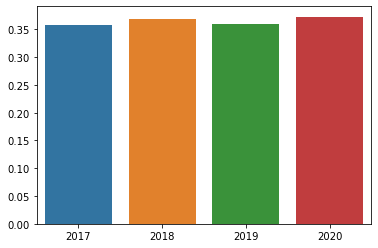

In [675]:
sns.barplot(x = yr_, y = [audio_feat_df17['valence'].mean(), audio_feat_df18['valence'].mean(), audio_feat_df19['valence'].mean(), audio_feat_df20['valence'].mean()])

<AxesSubplot:>

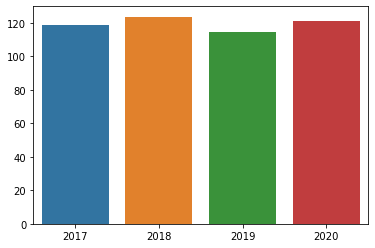

In [676]:
sns.barplot(x = yr_, y = [audio_feat_df17['tempo'].mean(), audio_feat_df18['tempo'].mean(), audio_feat_df19['tempo'].mean(), audio_feat_df20['tempo'].mean()])

# For 2017

In [677]:
#### 
perc_df = master_df.copy()
####

In [678]:
perc_opm = perc_df[(perc_df['category'] == 'opm') & (perc_df['year'] == 2017)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_opm = perc_opm['streams'].sum()
total_opm

585499292

In [679]:
perc_for = perc_df[(perc_df['category'] != 'opm') & (perc_df['year'] == 2017)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_for = perc_for['streams'].sum()
total_for

2656645167

In [680]:
perc_2017 = round(total_opm/(total_opm + total_for) * 100,3)
perc_2017

18.059

# For 2018

In [681]:
perc_opm = perc_df[(perc_df['category'] == 'opm') & (perc_df['year'] == 2018)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_opm = perc_opm['streams'].sum()
total_opm

1119378563

In [682]:
perc_for = perc_df[(perc_df['category'] != 'opm') & (perc_df['year'] == 2018)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_for = perc_for['streams'].sum()
total_for

2347711037

In [683]:
perc_2018 = round(total_opm/(total_opm + total_for) * 100,3)
perc_2018

32.286

# For 2019

In [684]:
perc_opm = perc_df[(perc_df['category'] == 'opm') & (perc_df['year'] == 2019)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_opm = perc_opm['streams'].sum()
total_opm

1650452429

In [685]:
perc_for = perc_df[(perc_df['category'] != 'opm') & (perc_df['year'] == 2019)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_for = perc_for['streams'].sum()
total_for

2431119342

In [686]:
perc_2019 = round(total_opm/(total_opm + total_for) * 100,3)
perc_2019

40.437

# For 2020

In [687]:
perc_opm = perc_df[(perc_df['category'] == 'opm') & (perc_df['year'] == 2020)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_opm = perc_opm['streams'].sum()
total_opm

1359253745

In [688]:
perc_for = perc_df[(perc_df['category'] != 'opm') & (perc_df['year'] == 2020)].groupby('track_id')[['streams']].sum().sort_values(by='streams', ascending = False)
total_for = perc_for['streams'].sum()
total_for

2641048657

In [689]:
perc_2020 = round(total_opm/(total_opm + total_for) * 100,3)
perc_2020

33.979

Text(0.5, 0, 'Year')

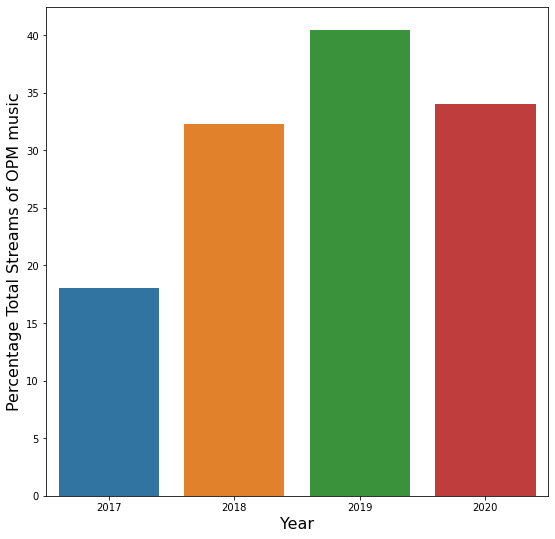

In [690]:
yr_ = [2017, 2018, 2019, 2020]
plt.figure(figsize = (9,9))
sns.barplot(x = yr_ , y = [perc_2017, perc_2018, perc_2019, perc_2020])
plt.ylabel('Percentage Total Streams of OPM music', fontsize = 16)
plt.xlabel('Year', fontsize = 16)

In [691]:
# we can further see whose artist has the most number of streams on 2019
art_df = master_df.copy()
art_df = art_df[(art_df['year'] == 2019) & (art_df['category'] == 'opm')]

In [692]:
art_df_17 = art_df.groupby('artist')[['streams']].sum().sort_values(by = 'streams', ascending = False)[:3]
art_df_17

,streams
artist,
December Avenue,244858688
Ben&Ben,173152481
This Band,136359046


In [693]:
track_df = master_df.copy()
track_df['release_date'] = pd.to_datetime(track_df['release_date'])
track_df['release_year'] = track_df['release_date'].dt.year
track_df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,valence,tempo,total_followers,genres,year,month,day,day_of_week,category,release_year
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.301,174.152,28456266,['pop'],2017,1,1,6,foreign,2016
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.494,85.043,7338877,"['pop', 'talentshow', 'ukpop']",2017,1,1,6,foreign,2016
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.661,95.010,17287932,"['dancepop', 'edm', 'electropop', 'pop', 'popd...",2017,1,1,6,foreign,2016
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.296,90.000,17287932,"['dancepop', 'edm', 'electropop', 'pop', 'popd...",2017,1,1,6,foreign,2016
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.447,100.048,29001677,"['pop', 'poprock']",2017,1,1,6,foreign,2016


# December  Avenue

In [694]:
# checking all the songs for each of the top 5 artist on 2019 based on the number of streams
ax_lst = track_df[(track_df['artist_name'] == 'December Avenue') & (track_df['year'] == 2019)].groupby('track_name')['streams'].sum().sort_values(ascending = False)[:3].index
ax_lst

Index(['Kung 'Di Rin Lang Ikaw', 'Sa Ngalan Ng Pag-Ibig', 'Bulong'], dtype='object', name='track_name')

In [695]:
da_tp = track_df[track_df['year'] == 2019][track_df['track_name'].isin(ax_lst)].set_index('date') 
da_tp.head(5)

<ipython-input-695-3aa4ebe99c2e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  da_tp = track_df[track_df['year'] == 2019][track_df['track_name'].isin(ax_lst)].set_index('date')


,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,valence,tempo,total_followers,genres,year,month,day,day_of_week,category,release_year
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,191715,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,15ufxdU6r8niuSmA9nu3ly,267759,2018-07-22,...,0.132,133.894,3500100,"['opm', 'pinoypoppunk']",2019,1,1,1,opm,2018
2019-01-01,6,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,149979,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,7xconhHQKj7Be4P2KvUmFz,285138,2017-04-29,...,0.271,155.985,3500100,"['opm', 'pinoypoppunk']",2019,1,1,1,opm,2017
2019-01-01,17,5nMKJJ5Rl6X1yn58aVeICO,Bulong,December Avenue,104742,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,6anqXAk4NZxdkUwvpfUqsB,270233,2018-04-08,...,0.351,134.877,3500100,"['opm', 'pinoypoppunk']",2019,1,1,1,opm,2018
2019-01-02,1,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,239490,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,15ufxdU6r8niuSmA9nu3ly,267759,2018-07-22,...,0.132,133.894,3500100,"['opm', 'pinoypoppunk']",2019,1,2,2,opm,2018
2019-01-02,6,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,189502,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,7xconhHQKj7Be4P2KvUmFz,285138,2017-04-29,...,0.271,155.985,3500100,"['opm', 'pinoypoppunk']",2019,1,2,2,opm,2017


Text(0.5, 1.0, 'December Avenue Top 5 Songs 7 day Average')

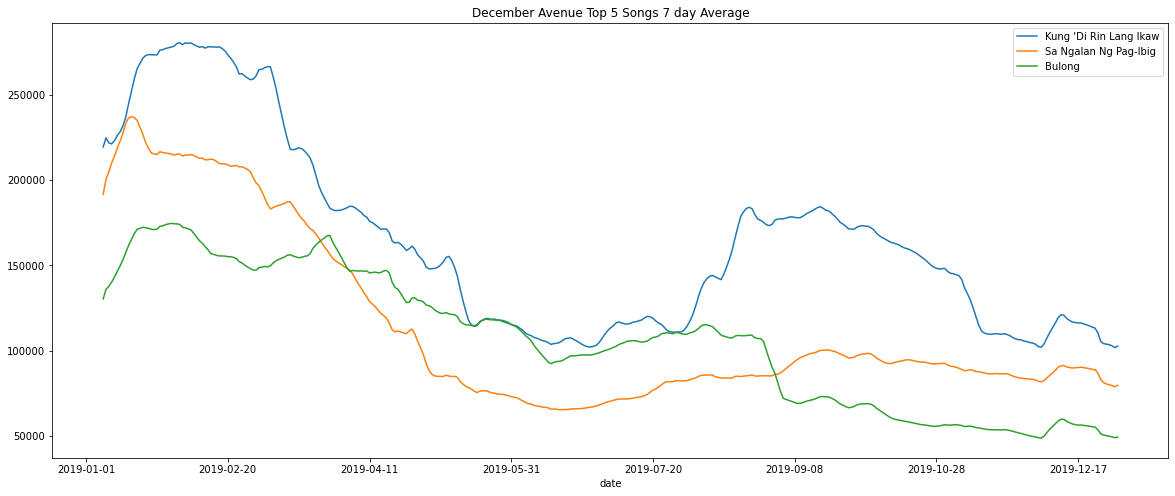

In [696]:
fig, ax = plt.subplots(figsize = (20, 8))

for song in ax_lst:
    dta = da_tp[da_tp['track_name'] == song]['streams'].rolling(7).mean()
    dta.plot(ax=ax, label = song)
plt.legend()
plt.title('December Avenue Top 5 Songs 7 day Average')

# Ben&Ben

In [697]:
bx_lst = track_df[(track_df['artist_name'] == 'Ben&Ben') & (track_df['year'] == 2019)].groupby('track_name')['streams'].sum().sort_values(ascending = False)[:3].index
bx_lst

Index(['Maybe The Night', 'Kathang Isip', 'Pagtingin'], dtype='object', name='track_name')

In [698]:
bb_tp = track_df[track_df['year'] == 2019][track_df['track_name'].isin(bx_lst)].set_index('date') 
bb_tp.head(5)

<ipython-input-698-8a554c236b8b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bb_tp = track_df[track_df['year'] == 2019][track_df['track_name'].isin(bx_lst)].set_index('date')


,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,valence,tempo,total_followers,genres,year,month,day,day_of_week,category,release_year
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,8,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,134581,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,4nQxblVnnFPehg9ujzdJ8L,318814,2017-06-23,...,0.295,126.921,2860085,['opm'],2019,1,1,1,opm,2017
2019-01-01,9,1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,129932,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,6LhZ3QMHGJeTes9cCTxK8e,217197,2017-10-27,...,0.498,74.050,2860085,['opm'],2019,1,1,1,opm,2017
2019-01-02,7,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,177685,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,4nQxblVnnFPehg9ujzdJ8L,318814,2017-06-23,...,0.295,126.921,2860085,['opm'],2019,1,2,2,opm,2017
2019-01-02,9,1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,165289,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,6LhZ3QMHGJeTes9cCTxK8e,217197,2017-10-27,...,0.498,74.050,2860085,['opm'],2019,1,2,2,opm,2017
2019-01-03,7,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,176017,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,4nQxblVnnFPehg9ujzdJ8L,318814,2017-06-23,...,0.295,126.921,2860085,['opm'],2019,1,3,3,opm,2017


Text(0.5, 1.0, 'Ben&Ben Top 5 Songs 7 day Average')

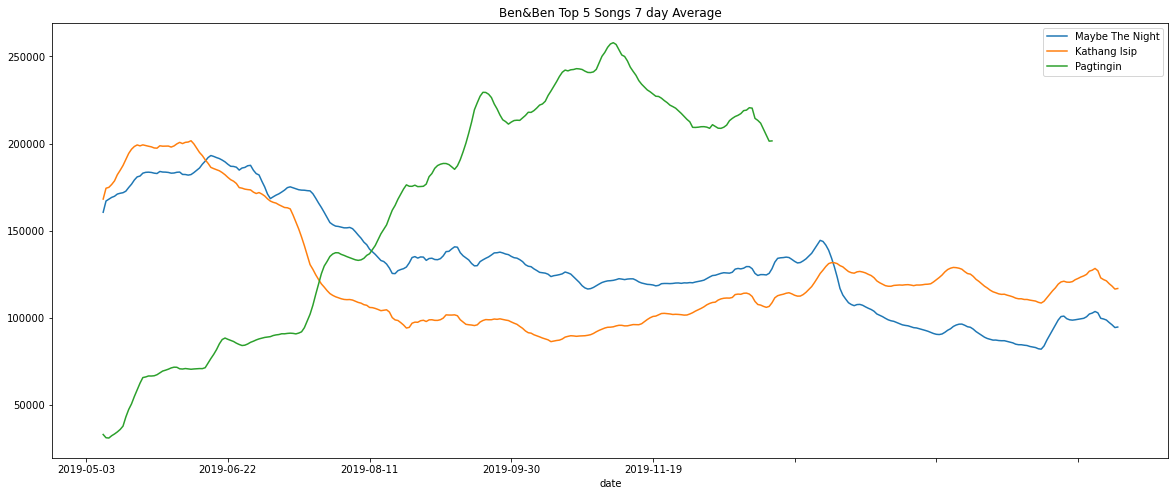

In [699]:
fig, ax = plt.subplots(figsize = (20, 8))

for song in bx_lst:
    dta = bb_tp[bb_tp['track_name'] == song]['streams'].rolling(7).mean()
    dta.plot(ax=ax, label = song)
plt.legend()
plt.title('Ben&Ben Top 5 Songs 7 day Average')

# This Band

In [700]:
cx_lst = track_df[(track_df['artist_name'] == 'This Band') & (track_df['year'] == 2019)].groupby('track_name')['streams'].sum().sort_values(ascending = False)[:3].index
cx_lst

Index(['Kahit Ayaw Mo Na', 'Hindi Na Nga', ''Di Na Babalik'], dtype='object', name='track_name')

In [701]:
tb_tp = track_df[track_df['year'] == 2019][track_df['track_name'].isin(cx_lst)].set_index('date') 
tb_tp.head(5)

<ipython-input-701-2670d3731e48>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tb_tp = track_df[track_df['year'] == 2019][track_df['track_name'].isin(cx_lst)].set_index('date')


,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,valence,tempo,total_followers,genres,year,month,day,day_of_week,category,release_year
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,5,5V2AX2WTOHl2FKtftvisV6,Kahit Ayaw Mo Na,This Band,177283,5HIZU0JzM0AgfItVOm4E08,This Band,4sChUazv5CQPX1V3VqVsqV,243015,2018-02-02,...,0.424,127.584,1305637,['opm'],2019,1,1,1,opm,2018
2019-01-01,27,50hVyhZM4nvizfrQe38F3l,Hindi Na Nga,This Band,74099,5HIZU0JzM0AgfItVOm4E08,This Band,1nZbFWVgFXFLQZ067FQdV8,282442,2018-09-14,...,0.108,136.818,1305637,['opm'],2019,1,1,1,opm,2018
2019-01-02,5,5V2AX2WTOHl2FKtftvisV6,Kahit Ayaw Mo Na,This Band,220887,5HIZU0JzM0AgfItVOm4E08,This Band,4sChUazv5CQPX1V3VqVsqV,243015,2018-02-02,...,0.424,127.584,1305637,['opm'],2019,1,2,2,opm,2018
2019-01-02,26,50hVyhZM4nvizfrQe38F3l,Hindi Na Nga,This Band,97876,5HIZU0JzM0AgfItVOm4E08,This Band,1nZbFWVgFXFLQZ067FQdV8,282442,2018-09-14,...,0.108,136.818,1305637,['opm'],2019,1,2,2,opm,2018
2019-01-03,5,5V2AX2WTOHl2FKtftvisV6,Kahit Ayaw Mo Na,This Band,222420,5HIZU0JzM0AgfItVOm4E08,This Band,4sChUazv5CQPX1V3VqVsqV,243015,2018-02-02,...,0.424,127.584,1305637,['opm'],2019,1,3,3,opm,2018


Text(0.5, 1.0, 'This Band Top 5 Songs 7 day Average')

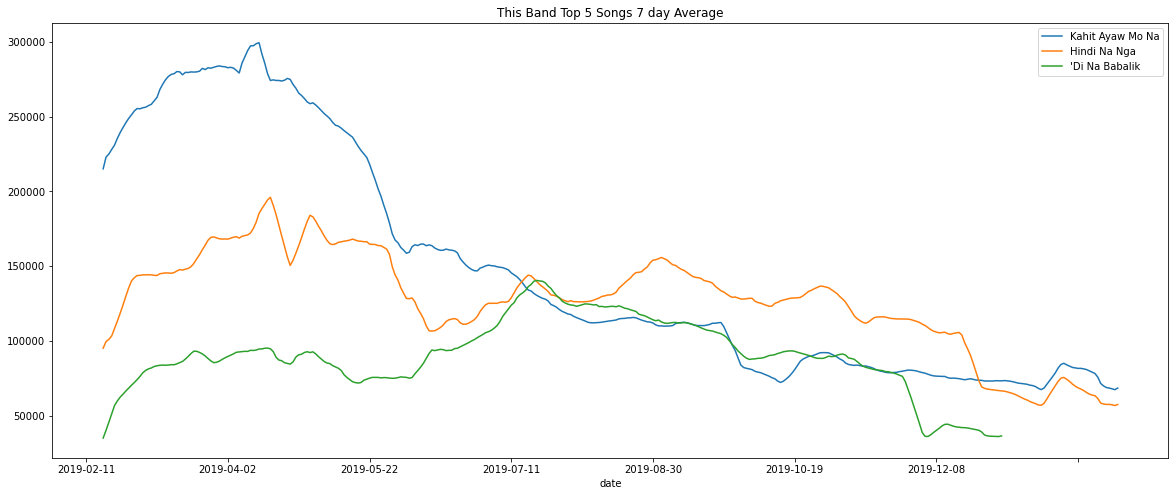

In [702]:
fig, ax = plt.subplots(figsize = (20, 8))

for song in cx_lst:
    dta = tb_tp[tb_tp['track_name'] == song]['streams'].rolling(7).mean()
    dta.plot(ax=ax, label = song)
plt.legend()
plt.title('This Band Top 5 Songs 7 day Average')